# Week 6 Prework

## Week 5 Review
1. Machine Learning - CART

## Week 6 Prework

<span style="font-size:1.5em; color:green">NLP</span>

1. Tokenize Natural Language Text
2. Categorize and tag unstructured data
3. Build Text Classification Model using NLTK

<span style="font-size:1.5em; color:green">PCA and LDA</span>

1. What's Dimensionality Reduction (unsupervised learning)
2. Latent Dirichlet Allocation (LDA)
3. Extract information from sample text dataset 

<span style="font-size:3em; color:green">Week 5 Review</span>

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

For you gamers out there, I have a fun dataset on StarCraft II! The dataset is recorded data of the actions players do while playing the game. Here's the data dictionary:
https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset

For those of you who aren't gamers, I'll explain a bit about certain features.
- APM (Actions per Minute) is the number of actions (keyboard and mouse clicks) a player does over a minute.
- PAC (Perception Action Cycle) is the number of actions (keyboard and mouse clicks) a player does before moving to another part of the screen.
- Time is measured in TimeStamps, 1 real-time second is equivalent to roughly 88.5 timestamps.

Let's run a regression!

In [42]:
sc = pd.read_csv('../../DS-SF-32/review and prework/review_datasets/SkillCraft1_Dataset.csv')
sc.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [43]:
sc.sort_values('LeagueIndex', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,?,?,?,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,?,?,?,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,?,?,?,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,?,?,?,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000


### As noticed above, LeagueIndex==8 are professional players. Their Age, HoursPerWeek and TotalHours are question marks. Since there's nowhere to get that data, let's just put in some values. (Note that there is some data for lower-ranked players.)

### After some research, usually StarCraft 2 pro gamers are roughly between the ages of 18-32. Let's create some variables at random to fill in the blanks.

In [44]:
# Using a seed so that we all get the same answer
np.random.seed(seed=1234)

def pro_ages(x):
    if '?' in x:
        return np.random.randint(low=18, high=33)
    else:
        return int(x)
    
sc['Age'] = sc['Age'].map(pro_ages)

In [45]:
sc.sort_values('LeagueIndex', ascending=True).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1080,3104,1,16,20,20,103.0962,0.000659,0.000233,5,0.000000,0.000000,0.002909,56.0000,70.7733,6.5289,29,0.000905,6,0.0,0.0
3155,8755,1,30,12,150,25.4442,0.000385,0.000160,3,0.000192,0.000064,0.000994,113.2000,165.1613,4.3548,7,0.000385,2,0.0,0.0
361,1074,1,22,16,400,38.3274,0.000000,0.000000,0,0.000021,0.000085,0.002578,76.0667,88.6281,2.8430,16,0.000618,3,0.0,0.0
1564,4517,1,31,12,200,41.5860,0.001058,0.000169,5,0.000196,0.000044,0.001724,130.2176,122.0206,4.0825,25,0.000622,5,0.0,0.0
1559,4510,1,25,4,50,43.2744,0.000824,0.000197,5,0.000000,0.000066,0.002626,67.5320,103.3000,2.9083,16,0.000226,9,0.0,0.0


### Since pro gamers play games for a living, let's say that they train for 8-12 hours per day. In a weeks time, that would be 56-84 hours per week. Let's randomize those numbers as well.

In [46]:
np.random.seed(seed=1234)

def pro_HPW(x):
    if '?' in x:
        return np.random.randint(low=56, high=85)
    else:
        return int(x)
    
sc['HoursPerWeek'] = sc['HoursPerWeek'].map(pro_HPW)

In [48]:
sc.sort_values('LeagueIndex', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,25,84,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,29,68,?,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,20,72,?,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,32,74,?,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,24,71,?,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000


### Based off of the randomized HoursPerWeek we've put in, let's calculate the TotalHours! StarCraft2 was released on July 27th, 2010 and this dataset was released September 20th, 2013, so that's roughly 3 years, 8 weeks.

In [56]:

weeks = (52*3)+8        

for x in range(sc.shape[0]):
    if sc['TotalHours'][x] == '?':
        sc.loc[:,('TotalHours',x)] = sc['HoursPerWeek'][x] * weeks
#         dfmi['one']['second'] - docs say no!
#         dfmi.loc[:,('one','second')] - docs say yes!


# SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame

# See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [57]:
sc.sort_values('LeagueIndex', ascending=True).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1080,3104,1,16,20,20,103.0962,0.000659,0.000233,5,0.000000,0.000000,0.002909,56.0000,70.7733,6.5289,29,0.000905,6,0.0,0.0
3155,8755,1,30,12,150,25.4442,0.000385,0.000160,3,0.000192,0.000064,0.000994,113.2000,165.1613,4.3548,7,0.000385,2,0.0,0.0
361,1074,1,22,16,400,38.3274,0.000000,0.000000,0,0.000021,0.000085,0.002578,76.0667,88.6281,2.8430,16,0.000618,3,0.0,0.0
1564,4517,1,31,12,200,41.5860,0.001058,0.000169,5,0.000196,0.000044,0.001724,130.2176,122.0206,4.0825,25,0.000622,5,0.0,0.0
1559,4510,1,25,4,50,43.2744,0.000824,0.000197,5,0.000000,0.000066,0.002626,67.5320,103.3000,2.9083,16,0.000226,9,0.0,0.0


### Since StarCraft2 was released on July 27th, 2010 and this dataset was released September 20th, 2013, people aren't going to be playing 24/7.  Base the max off pro gamers playing the most, which is hours per week 84 and total hours 13776. Anything higher, we will remove a zero/zeroes off the end since it is most likely data input errors.

In [58]:
sc.HoursPerWeek.unique()

array([ 10,  20,   6,   8,  42,  14,  24,  16,   4,  12,  30,  28,  70,
         2,  56,  36,  40,  18,  96,  50, 168,  48,  84,   0,  72, 112,
        90,  32,  98, 140,  71,  80,  60,  75,  62,  77,  68,  76,  81,
        73,  79,  65,  82,  67,  78,  61,  74,  83,  58,  59,  63,  57])

In [59]:
sc.TotalHours.unique()

array([   3000,    5000,     200,     400,     500,      70,     240,
         10000,    2708,     800,    6000,     190,     350,    1000,
          1500,    2000,     120,    1100,    2520,     700,     160,
           150,     250,     730,     230,     300,     100,     270,
          1200,      30,     600,     540,     280,    1600,      50,
           140,     900,     550,     625,    1300,     450,     750,
           612,     180,     770,     720,     415,    1800,    2200,
           480,     430,     639,     360,    1250,     365,     650,
           233,     416,    1825,     780,    1260,     315,      10,
           312,     110,    1700,      92,    2500,    1400,     220,
           999,     303,      96,     184,    4000,     420,      60,
          2400,    2160,      80,      25,     624,     176,    3280,
            35,    1163,     333,      75,       7,      40,     325,
            90,     175,      88,     850,      26,    1650,     465,
           235,    1

In [60]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null int64
HoursPerWeek            3395 non-null int64
TotalHours              3395 non-null int64
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non-nu

### Since there are still string values in TotalHours, pandas will change the dtype to an object. We will change it to an int.

In [61]:
sc['TotalHours'] = sc['TotalHours'].astype(int)
sc['TotalHours'].dtype

dtype('int64')

In [69]:
# for x in range(sc.shape[0]):
#     if sc['TotalHours'][x] > 13776:
#         sc['TotalHours'][x] = sc['TotalHours'][x] - 1000

sc[sc['TotalHours'] > 13776] -= 1000
        
# error for:
# for x in range(sc.shape[0]):
#     if sc['TotalHours'][x] > 13776:
#         sc.loc[:,('TotalHours',x)] = sc['TotalHours'][x] - 1000

In [70]:
sc.sort_values('TotalHours', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1793,4140,-995,-982,-976,997000,-718.5754,-999.976572,-999.999201,-995,-999.999959,-999.999553,-999.994864,-971.8836,-963.8734,-994.1478,-971,-999.998672,-994,-1000.000000,-1000.000000
2324,5518,-994,-980,-992,22000,-752.9836,-999.984206,-999.999562,-992,-999.999692,-999.998661,-999.995355,-982.3529,-962.8163,-993.4056,-971,-999.998140,-994,-1000.000000,-999.999988
770,1246,-995,-978,-984,17000,-751.9510,-999.976297,-999.999609,-993,-1000.000000,-999.999795,-999.995349,-962.1205,-954.6240,-995.2440,-979,-999.998474,-994,-1000.000000,-1000.000000
1978,4610,-996,-978,-990,15000,-847.7626,-999.988017,-999.999794,-999,-999.999984,-999.999636,-999.996649,-947.8104,-936.0189,-995.0425,-981,-999.999320,-995,-1000.000000,-1000.000000
3394,10095,8,25,84,13776,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


### This would have worked beautifully, but we still have a value that was 1,000,000. With subtracted 1000 from it, it is currently 999,000. Let's just remove the 3 zeroes.

In [71]:

sc[sc['TotalHours'] > 990000] -= 1000
        

### Now let's do the exact same thing for HoursPerWeek. Ignore all the copy issues, we aren't going to use the original data. The percentages are just random values that I guesstimated. Since they are so few, they shouldn't affect the outcome too much.

In [72]:
sc['HoursPerWeek'].unique()

array([   10,    20,     6,     8,    42,    14,    24,    16,     4,
          12,    30,    28,    70,     2,    56,    36,    40,    18,
          96,    50,   168,    48,  -984,    84,     0,    72,   112,
          90,    32,    98,   140, -1976,    71,  -990,    80,  -992,
          60,    75,    62,    77,    68,    76,    81,    73,    79,
          65,    82,    67,    78,    61,    74,    83,    58,    59,
          63,    57])

In [73]:
for x in range(sc.shape[0]):
    if sc['HoursPerWeek'][x] > 84 & sc['HoursPerWeek'][x] <= 100:
        sc['HoursPerWeek'][x] = sc['HoursPerWeek'][x] * 0.8
    elif sc['HoursPerWeek'][x] > 100:
        sc['HoursPerWeek'][x] = sc['HoursPerWeek'][x] * 0.5

/Users/bgveenstra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Now we have a dataset that we can use!

In [74]:
sc.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,8,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,8,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,8,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,8,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### With a cleaned dataset, let's do some plotting. I want to give you guys practice graphing so I will list some suggestions for graphing.
1. APM vs NumberOfPACs, hue by LeagueIndex
2. APM vs TotalHours, hue by LeagueIndex
3. LeagueIndex vs Age
4. TotalMapExplored vs NumberOfPACs, hued by LeagueIndex

I will graph the first one, just as an example.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

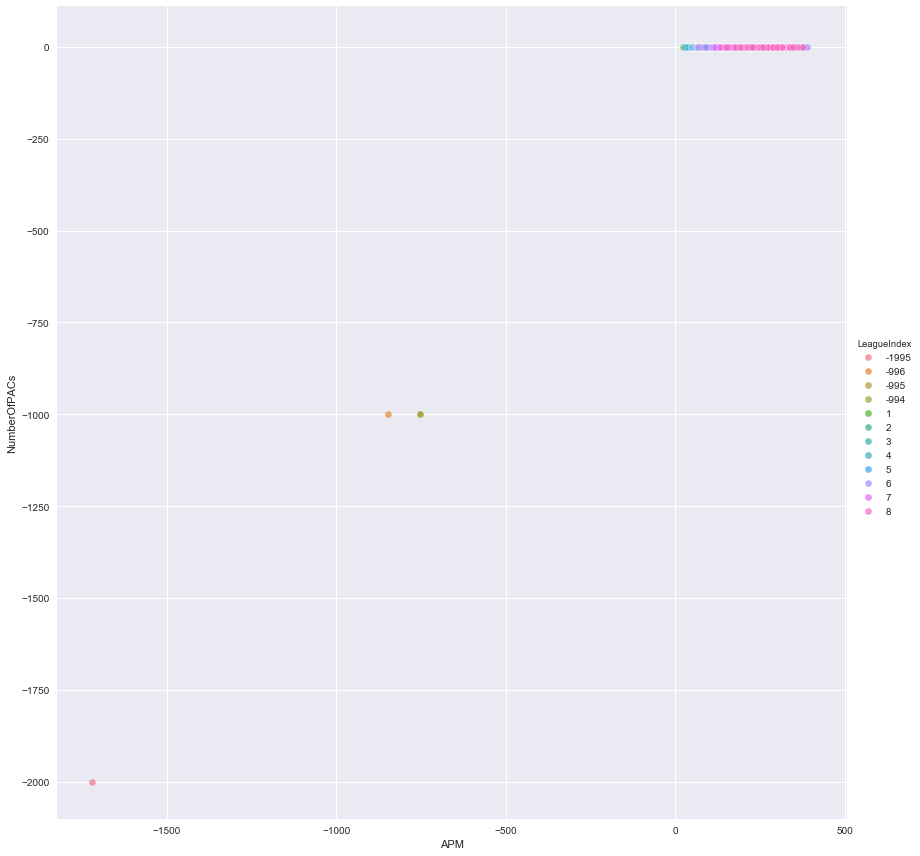

In [76]:
graph = sns.FacetGrid(sc, hue="LeagueIndex", size=12)
graph.map(plt.scatter, "APM", "NumberOfPACs", s=50, alpha=.7, linewidth=.5, edgecolor="white")
graph.add_legend();

### Now run a RandomForestClassifier, kNN and LogisticRegression. Which features are most important to being a professional?

<span style="font-size:3em; color:green">Week 6 Prework</span>

### NLP (Tuesday)

I have already pushed NLP tutorials into extra_review folder that do a very good job explaining how NLP works. The link to where I pushed the file is below. After git pulling, just navigate your way there.

https://github.com/ga-students/DS-SF-32/tree/master/review%20and%20prework/extra_tutorials/NLP-LDA

### PCA and LDA (Thursday)

Both topics are in the extra_tutorials. Please work on those problems.

PCA:
https://github.com/ga-students/DS-SF-32/tree/master/review%20and%20prework/extra_tutorials/PCA

LDA:
https://github.com/ga-students/DS-SF-32/tree/master/review%20and%20prework/extra_tutorials/NLP-LDA